# PROYEK PENYAJIAN DATA JUMLAH FASILITAS KESEHATAN PROVINSI DKI JAKARTA TAHUN 2020
Kali ini Kita akan melakukan analisis terhadap Data jumlah Faskes (Fasilitas Kesehatan) yang ada di DKI Jakarta tahun 2020. Data yang menjadi sumber pada proyek ini adalah Data yang didapat dari website data.jakarta.go.id

### IMPORT LIBRARY

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

from pandasql import sqldf

### Import Datanya

In [2]:
data= pd.read_csv("D:\D\Project\Jumlah Faskes menurut kecamatan DKI Jakarta 2020\jumlah-fasilitas-kesehatan-menurut-kecamatan-2020.csv")

In [3]:
data

,tahun,wilayah,kecamatan,fasilitas_kesehatan,jumlah
0,2020,Kepualauan Seribu,Kepulauan Seribu Utara,Rumah Sakit Umum,1
1,2020,Kepualauan Seribu,Kepulauan Seribu Selatan,Rumah Sakit Umum,0
2,2020,Jakarta Selatan,Cilandak,Rumah Sakit Umum,4
3,2020,Jakarta Selatan,Jagakarsa,Rumah Sakit Umum,5
4,2020,Jakarta Selatan,Kebayoran Baru,Rumah Sakit Umum,4
...,...,...,...,...,...
215,2020,Jakarta Utara,Pademangan,Klinik Balai Kesehatan,18
216,2020,Jakarta Utara,Tanjung Priok,Klinik Balai Kesehatan,59
217,2020,Jakarta Utara,Koja,Klinik Balai Kesehatan,20
218,2020,Jakarta Utara,Kelapa Gading,Klinik Balai Kesehatan,86


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tahun                220 non-null    int64 
 1   wilayah              220 non-null    object
 2   kecamatan            220 non-null    object
 3   fasilitas_kesehatan  220 non-null    object
 4   jumlah               220 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 8.7+ KB


### Jumlah Faskes per wilayah

In [34]:
query="""
SELECT wilayah, sum(jumlah) as jumlah_faskes from data group by wilayah"""
data_faskes_wilayah= sqldf(query)
data_faskes_wilayah

,wilayah,jumlah_faskes
0,Jakarta Barat,332
1,Jakarta Pusat,388
2,Jakarta Selatan,461
3,Jakarta Timur,358
4,Jakarta Utara,339
5,Kepualauan Seribu,7


### Jumlah Faskes berdasarkan jenis faskes

In [33]:
query="""
SELECT fasilitas_kesehatan, sum(jumlah) as jumlah_faskes from data group by fasilitas_kesehatan"""
data_faskes_jenis= sqldf(query)
data_faskes_jenis

,fasilitas_kesehatan,jumlah_faskes
0,Klinik Balai Kesehatan,1361
1,Puskesmas,331
2,Rumah Sakit Bersalin,22
3,Rumah Sakit Khusus,29
4,Rumah Sakit Umum,142


### Jumlah Faskes berdasarkan Kecamatan

In [38]:
query="""
SELECT kecamatan, sum(jumlah) as jumlah_faskes from data group by kecamatan order by jumlah_faskes desc"""
data_faskes_kec=sqldf(query)
data_faskes_kec.head()

,kecamatan,jumlah_faskes
0,Kelapa Gading,93
1,Kebayoran Baru,92
2,Tanjung Priok,82
3,Tanah Abang,79
4,Pasar Rebo,73


### Jumlah Faskes beradasarkan wilayah dan jenis faskes

In [18]:
query="""
SELECT wilayah, fasilitas_kesehatan, sum(jumlah) as jumlah_faskes from data group by wilayah, fasilitas_kesehatan"""
sqldf(query)

,wilayah,fasilitas_kesehatan,jumlah_faskes
0,Jakarta Barat,Klinik Balai Kesehatan,229
1,Jakarta Barat,Puskesmas,74
2,Jakarta Barat,Rumah Sakit Bersalin,3
3,Jakarta Barat,Rumah Sakit Khusus,5
4,Jakarta Barat,Rumah Sakit Umum,21
5,Jakarta Pusat,Klinik Balai Kesehatan,310
6,Jakarta Pusat,Puskesmas,42
7,Jakarta Pusat,Rumah Sakit Bersalin,3
8,Jakarta Pusat,Rumah Sakit Khusus,7
9,Jakarta Pusat,Rumah Sakit Umum,26


### Grafik jumlah faskes per wilayah

In [26]:
map_geojson= gpd.read_file("Batas_Administrasi_DKI_Jakarta.geojson")

<AxesSubplot:>

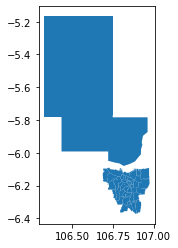

In [27]:
map_geojson.plot()

In [29]:
map_geojson.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       44 non-null     int64   
 1   NO_KAB         42 non-null     object  
 2   NO_KEC         42 non-null     object  
 3   KECAMATAN      44 non-null     object  
 4   WILAYAH        44 non-null     object  
 5   Shape__Area    44 non-null     float64 
 6   Shape__Length  44 non-null     float64 
 7   geometry       44 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 2.9+ KB


In [45]:
map_geojson['KECAMATAN'].unique()

array(['GAMBIR', 'SAWAH BESAR', 'KEMAYORAN', 'SENEN', 'CEMPAKA PUTIH',
       'MENTENG', 'TANAH ABANG', 'JOHAR BARU', 'PENJARINGAN',
       'TANJUNG PRIOK', 'KOJA', 'CILINCING', 'PADEMANGAN',
       'KELAPA GADING', 'CENGKARENG', 'GROGOL PETAMBURAN', 'TAMAN SARI',
       'TAMBORA', 'KEBON JERUK', 'KALI DERES', 'PALMERAH', 'KEMBANGAN',
       'TEBET', 'SETIA BUDI', 'MAMPANG PRAPATAN', 'PASAR MINGGU',
       'KEBAYORAN LAMA', 'CILANDAK', 'KEBAYORAN BARU', 'PANCORAN',
       'JAGAKARSA', 'PESANGGRAHAN', 'MATRAMAN', 'PULO GADUNG',
       'JATINEGARA', 'KRAMAT JATI', 'PASAR REBO', 'CAKUNG', 'DUREN SAWIT',
       'MAKASAR', 'CIRACAS', 'CIPAYUNG', 'KEP. SERIBU SELATAN',
       'KEP. SERIBU UTARA'], dtype=object)

In [42]:
data_faskes_kec['kecamatan'].unique()

array(['Kelapa Gading', 'Kebayoran Baru', 'Tanjung Priok', 'Tanah Abang',
       'Pasar Rebo', 'Gambir', 'Penjaringan', 'Kebayoran Lama',
       'Grogol Petamburan', 'Pulogadung', 'Menteng', 'Kemayoran',
       'Setiabudi', 'Kalideres', 'Kebon Jeruk', 'Tebet', 'Kembangan',
       'Duren Sawit', 'Cakung', 'Cengkareng', 'Pasar Minggu', 'Cilandak',
       'Jatinegara', 'Kramat Jati', 'Cempaka Putih', 'Cilincing', 'Senen',
       'Sawah Besar', 'Pancoran', 'Koja', 'Jagakarsa ', 'Palmerah',
       'Mampang Prapatan', 'Pesanggrahan', 'Taman Sari', 'Pademangan',
       'Makasar', 'Tambora', 'Johar Baru', 'Cipayung', 'Ciracas',
       'Matraman', 'Kepulauan Seribu Utara', 'Kepulauan Seribu Selatan'],
      dtype=object)

In [48]:
kec={
"CAKUNG": "Cakung",
"CEMPAKA PUTIH": "Cempaka Putih",
"CENGKARENG": "Cengkareng",
"CILANDAK": "Cilandak",
"CILINCING": "Cilincing",
"CIPAYUNG": "Cipayung",
"CIRACAS": "Ciracas",
"DUREN SAWIT": "Duren Sawit",
"GAMBIR": "Gambir",
"GROGOL PETAMBURAN": "Grogol Petamburan",
"JAGAKARSA": "Jagakarsa",
"JATINEGARA": "Jatinegara",
"JOHAR BARU": "Johar Baru",
"KALI DERES": "Kalideres",
"KEBAYORAN BARU": "Kebayoran Baru",
"KEBAYORAN LAMA": "Kebayoran Lama",
"KEBON JERUK": "Kebon Jeruk",
"KELAPA GADING": "Kelapa Gading",
"KEMAYORAN": "Kemayoran",
"KEMBANGAN": "Kembangan",
"KEP. SERIBU SELATAN": "Kepulauan Seribu Selatan",
"KEP. SERIBU UTARA": "Kepulauan Seribu Utara",
"KOJA": "Koja",
"KRAMAT JATI": "Kramat Jati",
"MAKASAR": "Makasar",
"MAMPANG PRAPATAN": "Mampang Prapatan",
"MATRAMAN": "Matraman",
"MENTENG": "Menteng",
"PADEMANGAN": "Pademangan",
"PALMERAH": "Palmerah",
"PANCORAN": "Pancoran",
"PASAR MINGGU": "Pasar Minggu",
"PASAR REBO": "Pasar Rebo",
"PENJARINGAN": "Penjaringan",
"PESANGGRAHAN": "Pesanggrahan",
"PULO GADUNG": "Pulogadung",
"SAWAH BESAR": "Sawah Besar",
"SENEN": "Senen",
"SETIA BUDI": "Setiabudi",
"TAMAN SARI": "Taman Sari",
"TAMBORA": "Tambora",
"TANAH ABANG": "Tanah Abang",
"TANJUNG PRIOK": "Tanjung Priok",
"TEBET": "Tebet"
}

In [49]:
map_geojson['KEC']=map_geojson['KECAMATAN'].map(kec)
map_geojson

,OBJECTID,NO_KAB,NO_KEC,KECAMATAN,WILAYAH,Shape__Area,Shape__Length,geometry,KEC
0,1,71,01,GAMBIR,JAKARTA PUSAT,7.508915e+06,13230.032849,"POLYGON ((106.80161 -6.15971, 106.80164 -6.160...",Gambir
1,2,71,02,SAWAH BESAR,JAKARTA PUSAT,5.358573e+06,13639.388239,"POLYGON ((106.83303 -6.14156, 106.83308 -6.141...",Sawah Besar
2,3,71,03,KEMAYORAN,JAKARTA PUSAT,7.168174e+06,13630.925100,"POLYGON ((106.84552 -6.15350, 106.84561 -6.153...",Kemayoran
3,4,71,04,SENEN,JAKARTA PUSAT,4.350701e+06,13875.258874,"POLYGON ((106.84869 -6.16815, 106.84874 -6.168...",Senen
4,5,71,05,CEMPAKA PUTIH,JAKARTA PUSAT,4.666391e+06,10820.617054,"POLYGON ((106.87818 -6.16638, 106.87870 -6.166...",Cempaka Putih
5,6,71,06,MENTENG,JAKARTA PUSAT,6.473875e+06,12872.197339,"POLYGON ((106.83783 -6.18606, 106.83805 -6.186...",Menteng
6,7,71,07,TANAH ABANG,JAKARTA PUSAT,1.004789e+07,14908.715096,"POLYGON ((106.82255 -6.18508, 106.82257 -6.185...",Tanah Abang
7,8,71,08,JOHAR BARU,JAKARTA PUSAT,2.368213e+06,6486.194393,"POLYGON ((106.85768 -6.17399, 106.85786 -6.174...",Johar Baru
8,9,72,01,PENJARINGAN,JAKARTA UTARA,3.596952e+07,42209.794334,"POLYGON ((106.72644 -6.09000, 106.72646 -6.090...",Penjaringan
9,10,72,02,TANJUNG PRIOK,JAKARTA UTARA,2.254549e+07,33300.262978,"MULTIPOLYGON (((106.88265 -6.09588, 106.88263 ...",Tanjung Priok


In [51]:
map_geojson_merge=map_geojson.merge(data_faskes_kec, how='inner', left_on='KEC', right_on='kecamatan')
map_geojson_merge

,OBJECTID,NO_KAB,NO_KEC,KECAMATAN,WILAYAH,Shape__Area,Shape__Length,geometry,KEC,kecamatan,jumlah_faskes
0,1,71,01,GAMBIR,JAKARTA PUSAT,7.508915e+06,13230.032849,"POLYGON ((106.80161 -6.15971, 106.80164 -6.160...",Gambir,Gambir,72
1,2,71,02,SAWAH BESAR,JAKARTA PUSAT,5.358573e+06,13639.388239,"POLYGON ((106.83303 -6.14156, 106.83308 -6.141...",Sawah Besar,Sawah Besar,33
2,3,71,03,KEMAYORAN,JAKARTA PUSAT,7.168174e+06,13630.925100,"POLYGON ((106.84552 -6.15350, 106.84561 -6.153...",Kemayoran,Kemayoran,54
3,4,71,04,SENEN,JAKARTA PUSAT,4.350701e+06,13875.258874,"POLYGON ((106.84869 -6.16815, 106.84874 -6.168...",Senen,Senen,35
4,5,71,05,CEMPAKA PUTIH,JAKARTA PUSAT,4.666391e+06,10820.617054,"POLYGON ((106.87818 -6.16638, 106.87870 -6.166...",Cempaka Putih,Cempaka Putih,39
5,6,71,06,MENTENG,JAKARTA PUSAT,6.473875e+06,12872.197339,"POLYGON ((106.83783 -6.18606, 106.83805 -6.186...",Menteng,Menteng,55
6,7,71,07,TANAH ABANG,JAKARTA PUSAT,1.004789e+07,14908.715096,"POLYGON ((106.82255 -6.18508, 106.82257 -6.185...",Tanah Abang,Tanah Abang,79
7,8,71,08,JOHAR BARU,JAKARTA PUSAT,2.368213e+06,6486.194393,"POLYGON ((106.85768 -6.17399, 106.85786 -6.174...",Johar Baru,Johar Baru,21
8,9,72,01,PENJARINGAN,JAKARTA UTARA,3.596952e+07,42209.794334,"POLYGON ((106.72644 -6.09000, 106.72646 -6.090...",Penjaringan,Penjaringan,70
9,10,72,02,TANJUNG PRIOK,JAKARTA UTARA,2.254549e+07,33300.262978,"MULTIPOLYGON (((106.88265 -6.09588, 106.88263 ...",Tanjung Priok,Tanjung Priok,82


<AxesSubplot:title={'center':'Jumlah Faskes yang ada di Provinsi DKI Jakarta'}>

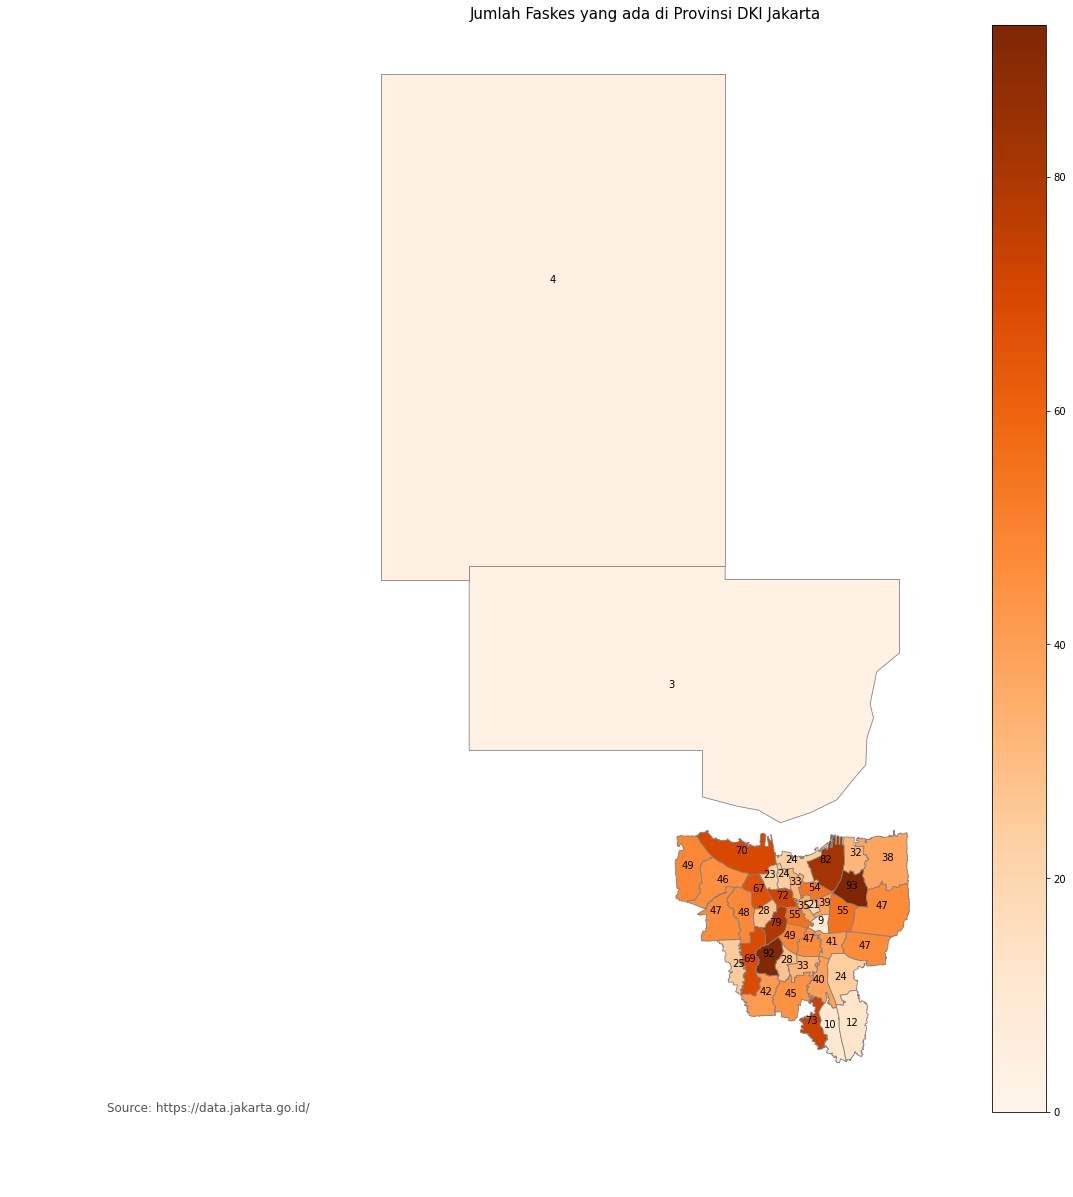

In [64]:
# set a variable that will call whatever column we want to visualise on the map
values = 'jumlah_faskes'

# set the value range for the choropleth
vmin, vmax = 0,max(map_geojson_merge['jumlah_faskes'])

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 20))

# remove the axis
ax.axis('off')

# add a title
title = 'Jumlah Faskes yang ada di Provinsi DKI Jakarta'
ax.set_title(title, fontdict={'fontsize': '15', 'fontweight' : '3'})

# create an annotation for the data source
ax.annotate('Source: https://data.jakarta.go.id/',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12 ,color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# add the colorbar to the figure
cbar = fig.colorbar(sm)

# Add Labels Province Name
#map_geojson_merge['coords'] = map_geojson_merge['geometry'].apply(lambda x: x.representative_point().coords[:])
#map_geojson_merge['coords'] = [coords[0] for coords in map_geojson_merge['coords']]
#for idx, row in map_geojson_merge.iterrows():
#    plt.annotate((row['KEC'], row['jumlah_faskes']), row['coords'], ha='center', fontsize=5)

# Add Value Labels
map_geojson_merge['coords'] = map_geojson_merge['geometry'].apply(lambda x: x.representative_point().coords[:])
map_geojson_merge['coords'] = [coords[0] for coords in map_geojson_merge['coords']]
for idx, row in map_geojson_merge.iterrows():
    plt.annotate(text=row[values], xy=row['coords'],horizontalalignment='center')

# create map
map_geojson_merge.plot(column=values, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.5',norm=plt.Normalize(vmin=vmin, vmax=vmax)) #cmap='Oranges'